polynomial regression

In [2]:
# if our data is actualy more complex than a simple straight line. we can fit a
# linear model to this non linear data by adding power to the features

In [3]:
# let's generate some non-linear data
import numpy as np

In [8]:
m=100
x = np.random.rand(m,1)
y = x**2 + 2*x + np.random.randn(m,1)

(100, 1)

In [9]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


with the help of sklearn

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)



In [29]:
x_poly

array([[3.90474575e-01, 1.52470394e-01],
       [9.57160238e-01, 9.16155721e-01],
       [7.70912992e-01, 5.94306842e-01],
       [6.03080872e-02, 3.63706538e-03],
       [6.29549377e-01, 3.96332418e-01],
       [7.90847439e-01, 6.25439672e-01],
       [7.76775975e-01, 6.03380916e-01],
       [3.59182344e-01, 1.29011956e-01],
       [9.21353143e-01, 8.48891614e-01],
       [4.62708194e-02, 2.14098873e-03],
       [5.45483492e-01, 2.97552240e-01],
       [7.25407464e-01, 5.26215989e-01],
       [3.90462989e-01, 1.52461346e-01],
       [2.84237388e-01, 8.07908928e-02],
       [2.62556609e-01, 6.89359728e-02],
       [3.34071959e-01, 1.11604074e-01],
       [1.02344937e-01, 1.04744862e-02],
       [8.47380857e-01, 7.18054317e-01],
       [2.62604660e-01, 6.89612074e-02],
       [1.11608439e-02, 1.24564436e-04],
       [7.21576849e-02, 5.20673150e-03],
       [4.67857386e-01, 2.18890533e-01],
       [9.98510574e-01, 9.97023367e-01],
       [7.32742737e-01, 5.36911919e-01],
       [7.996576

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)


LinearRegression()

In [31]:
lin_reg.intercept_,lin_reg.coef_

(array([0.03298175]), array([[1.99273873, 1.02992887]]))

In [33]:
# how to know whther our data is complex or not?
# let's try to do this with the help of graph
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

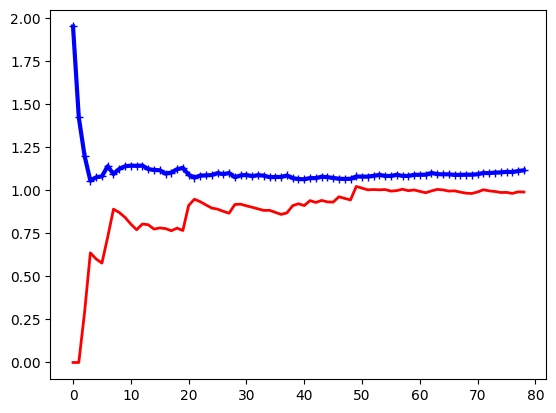

In [38]:
def plot_learning_curves(model,x,y):
    X_train,X_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-+", linewidth=3, label="val")
lin_reg = LinearRegression()
lin_reg.fit(x,y)
plot_learning_curves(lin_reg,x,y)

Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1,solver = "cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.4]])

array([[3.78535621]])